In [1]:
import numpy as np
import matplotlib.pyplot as plt

print(np.__version__)

1.20.3


                                              ## Cosmología LCDM, H0 cerca ##

In [2]:
# Constantes medidas
G0 = 6.67430 * np.power(10., -11.)
h_cerca = 0.738 # valor de h hoy determinado a partir del universo cercano 0.738+0.007
H0_cerca = (h_cerca * 100 * np.power(10., 3.)) / (3.09 * np.power(10., 16.) * np.power(10., 6.)) # Constante de Hubble medido en universo cercano
c = 2.99792458 * np.power(10., 5.) * np.power(10., 3.)

In [3]:
# Parámetros iniciales (parámetros de densidad asumiendo H0 medido en el universo temprano)
Omega_r0 = (4.152 * np.power(10., -5.)) / np.power(h_cerca, 2.)
Omega_m0 = 0.143 / np.power(h_cerca, 2.)
Omega_L0 = 1 - Omega_m0 - Omega_r0
L_clas = (3 * Omega_L0 * np.power(H0_cerca, 2.))/np.power(c, 2.)

P = 1000000 # Número de pasos
tHi = 0. # tiempo inicial multiplicado por H0
tHf = 1. # tiempo final multiplicado por H0
Delta_tH_ini = (tHf - tHi) / P # Largo del paso inicial

a1 = np.zeros(P, dtype=np.float64)
Delta_a = np.zeros(P, dtype=np.float64)
tH = np.zeros(P, dtype=np.float64)
Delta_tH = np.zeros(P, dtype=np.float64)

# Condiciones iniciales
a1[0] = 1.
tH[0] = 1.
Delta_tH[0] = Delta_tH_ini

In [4]:
# Resolver la evolución del factor de escala en cosmología clásica
for i in range(P-1):
    Delta_a[i] = np.sqrt((Omega_r0/np.power(a1[i], 2.)) + (Omega_m0/a1[i]) + (Omega_L0*np.power(a1[i], 2.))) * Delta_tH[i]
    tH[i+1] = tH[i] - Delta_tH[i]
    a1[i+1] = a1[i] - Delta_a[i]
    Delta_tH[i+1] = (Delta_a[0]/Delta_tH[0]) * (Delta_tH[i]/Delta_a[i]) * Delta_tH[0]

P_ini = P - 9
t = np.zeros(P_ini, dtype=np.float64)
a = np.zeros(P_ini, dtype=np.float64)
z = np.zeros(P_ini, dtype=np.float64)
Delta_t = np.zeros(P, dtype=np.float64)

# Orden del factor de escala y del tiempo. Se excluyen los factores de escala negativos
for i in range(P_ini):
    t[i] = (tH[P_ini-i]/H0_cerca) - (tH[P_ini]/H0_cerca)
    a[i] = a1[P_ini-i]
    z[i] = (1./a[i]) - 1.

for i in range(P):
    Delta_t[i] = Delta_tH[P-1-i]/H0_cerca #se transforman los Delta_tH a Delta_t y se ordenan

t0 = t[P_ini-1] # Edad del universo cosmología LCDM

In [5]:
Pm = P_ini - 1
Da = np.zeros(Pm, dtype=np.float64)
H = np.zeros(Pm, dtype=np.float64)

# Cálculo de la derivada del factor de escala y del parámetro de Hubble
for i in range(Pm):
    Da[i] = (a[i+1]-a[i])/(t[i+1]-t[i])
    H[i] = Da[i]/a[i]

In [6]:
print("a_B:", a[0])
print("Da_B", Da[0])
print("t_B en años:", t[0]/(60.*60.*24.*365.))
print("z_B:", z[0])
print("h_B:", (H[0] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print(" ")
print("a_r-m:", a[285])
print("Da_r-m", Da[285])
print("t_r-m en años:", t[285]/(60.*60.*24.*365.))
print("z_r-m:", z[285])
print("h_r-m:", (H[285] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print("Ome_r-Ome_m:", (Omega_r0/np.power(a[285], 2.)) - (Omega_m0/a[285]))
print(" ")
print("a_CMB:", a[902])
print("Da_CMB", Da[902])
print("t_CMB en años:", t[902]/(60.*60.*24.*365.))
print("z_CMB:", z[902])
print("h_CMB:", (H[902] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print(" ")
print("a_m-L:", a[702770])
print("Da_m-L", Da[702770])
print("t_m-L en millones de años:", t[702770]/(60.*60.*24.*365.*np.power(10., 6.)))
print("z_m-L:", z[702770])
print("h_m-L:", (H[702770] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print("Ome_m-Ome_L:", (Omega_m0/a[702770]) - (Omega_L0*np.power(a[702770], 2.)))
print(" ")
print("a_0:", a[P_ini-1])
print("Da_0", Da[P_ini-2])
print("L_0", L_clas)
print("t_0 en millones de años:", t[P_ini-1]/(60.*60.*24.*365.*np.power(10., 6.)))
print("z_0:", z[P_ini-1])
print("h_0:", (H[P_ini-2] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print("Omega_rad:", Omega_r0)
print("Omega_mat:", Omega_m0)
print("Omega_Lam:", Omega_L0)

a_B: 2.394034420694662e-07
Da_B 1.0765200124276133e-14
t_B en años: 0.0
z_B: 4177048.3830654123
h_B: 13894732714.144148
 
a_r-m: 0.0002902514482030616
Da_r-m 1.0133306357136244e-16
t_r-m en años: 50191.82238656305
z_r-m: 3444.2885806116437
h_r-m: 107878.58884908991
Ome_r-Ome_m: 0.30605219899257463
 
a_CMB: 0.0009080283095149841
Da_CMB 4.662404618493043e-17
t_CMB en años: 367005.88053828746
z_CMB: 1100.2872501014222
h_CMB: 15866.058491985557
 
a_m-L: 0.702779151948222
Da_m-L 2.0516703917139165e-18
t_m-L en millones de años: 8986.93598938819
z_m-L: 0.4229221188873229
h_m-L: 0.9020844589401085
Ome_m-Ome_L: 0.009413462571938813
 
a_0: 0.999999
Da_0 2.3883480670309967e-18
L_0 1.4039746815071237e-52
t_0 en millones de años: 13275.896712634605
z_0: 1.000001000006634e-06
h_0: 0.7380010287141882
Omega_rad: 7.623328265802984e-05
Omega_mat: 0.2625568261102665
Omega_Lam: 0.7373669406070755


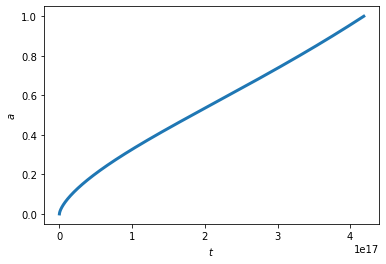

In [7]:
plt.plot(t, a, linewidth=3)
plt.xlabel('$t$')
plt.ylabel('$a$')
plt.show()

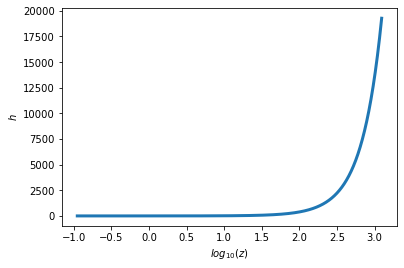

In [8]:
# Se excluyen los valores que no son de interes en la gráfica
S = 800 + 100000
x = np.zeros(Pm-S, dtype=float)
y = np.zeros(Pm-S, dtype=float)
for i in range(Pm-S):
    x[i] = np.log10(z[i+S-100000])
    y[i] = (H[i+S-100000] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))
    
plt.plot(x, y, linewidth=3)
plt.xlabel('$log_{10}(z)$')
plt.ylabel('$h$')
plt.show()

In [9]:
zmin = 996839
zmax = 23
Nplot = zmin-zmax

zplot = np.zeros(Nplot, dtype=np.float64)
Omega_rplot = np.zeros(Nplot, dtype=np.float64)
Omega_mplot = np.zeros(Nplot, dtype=np.float64)
Omega_Lplot = np.zeros(Nplot, dtype=np.float64)

for i in range(Nplot):
    zplot[i] = z[i+zmax]
    Omega_rplot[i] = (Omega_r0*np.power(H0_cerca, 2.))/(np.power(a[i+zmax], 4.)*np.power(H[i+zmax], 2.))
    Omega_mplot[i] = (Omega_m0*np.power(H0_cerca, 2.))/(np.power(a[i+zmax], 3.)*np.power(H[i+zmax], 2.))
    Omega_Lplot[i] = (Omega_L0*np.power(H0_cerca, 2.))/(np.power(a[i+zmax], 0.)*np.power(H[i+zmax], 2.))

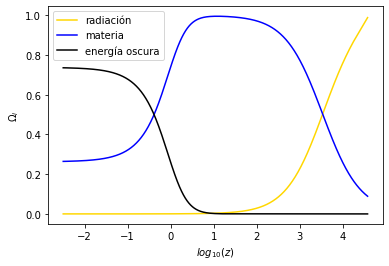

In [10]:
plt.plot(np.log10(zplot), Omega_rplot, color='gold', label='radiación')
plt.plot(np.log10(zplot), Omega_mplot, color='blue', label='materia')
plt.plot(np.log10(zplot), Omega_Lplot,  color='black', label='energía oscura')
plt.legend() # Mostrar leyenda

plt.xlabel('$log_{10}(z)$')
plt.ylabel('$\Omega_i$')
plt.show()

In [11]:
# Promedios de las componentes no dominantes del universo

suma_rho_L = 0
suma_rho_m1 = 0
suma_rho_m2 = 0
suma_rho_r = 0

for i in range(Pm-1):
    if i>=702770:
        suma_rho_m1 = suma_rho_m1 + ((3*np.power(c, 2.)*np.power(H0_cerca, 2.)*Omega_m0)/(8*np.pi*G0*np.power(a[i], 3.)))
    if i>=285:
        if i<702770:
            suma_rho_L = suma_rho_L + ((3*np.power(c, 2.)*np.power(H0_cerca, 2.)*Omega_L0)/(8*np.pi*G0*np.power(a[i], 0.)))
            suma_rho_r = suma_rho_r + ((3*np.power(c, 2.)*np.power(H0_cerca, 2.)*Omega_r0)/(8*np.pi*G0*np.power(a[i], 4.)))
    if i<285:
        suma_rho_m2 = suma_rho_m2 + ((3*np.power(c, 2.)*np.power(H0_cerca, 2.)*Omega_m0)/(8*np.pi*G0*np.power(a[i], 3.)))

prom_rho_m1 = suma_rho_m1/(t[P_ini-2]-t[702770])
prom_rho_L = suma_rho_L/(t[702769]-t[285])
prom_rho_r = suma_rho_r/(t[702769]-t[285])
prom_rho_m2 = suma_rho_m2/(t[284]-t[0])

In [12]:
# Rhos iniciales (tiempo actual)

rho_L0 = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0)
rho_m0 = (3*Omega_m0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0)
rho_r0 = (3*Omega_r0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0)

In [13]:
h_CMB_LCDM_cerca = (H[902]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)) # valor de h en la época del CMB para LCDM considerando H0 cerca
print("h_CMB_LCDM_cerca:", h_CMB_LCDM_cerca)

h_CMB_LCDM_cerca: 15866.058491985557


                                        ## Cosmología LCDM aproximada, H0 cerca ##

In [16]:
# Dominio de Lambda

# Parámetros iniciales
DG0 = 0 * np.power(10., -14.) * G0 # Derivada de G hoy
PtiL = 1. # porcentaje del tiempo de transición materia-Lambda SD respecto a la cosmología clásica (1=100%, no hay cambio)

Delta_tL = Delta_t[702770]
tiL = (t0-t[702770]) * PtiL # tiempo de transición materia-Lambda SD (duración de Lambda)
PL = 302990 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

In [17]:
# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    #if i == 0:
    #    L[PL-1-i] = L_clas
    #if i != 0:
    #    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*prom_rho_m1)/(np.power(c, 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if zL[PL-1-i-1] >= z[702770]: # forzar a que el redshift de la transición sea en el mismo que LCDM
        print(i)
        break
    #if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
    #    print(i)
    #    break

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

In [18]:
print("a_0:", aL[PL-1])
print("Da_0:", DaL[PL-1])
print("DDa_0:", DDaL[PL-1])
print("G_0:", GL[PL-1])
print("DG_0:", DGL[PL-1])
print("DDG_0:", DDGL[PL-1])
print("L_0:", L[PL-1])
print("t_0 en millones de años:", tL[PL-1]/(60.*60.*24.*365.*np.power(10., 6.)))
print("z_0:", zL[PL-1])
print("h_0:", (HL[PL-2] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print(" ")
print("a_m-L:", aL[0])
print("Da_m-L:", DaL[0])
print("DDa_m-L:", DDaL[0])
print("G_m-L:", GL[0])
print("DG_m-L:", DGL[0])
print("DDG_m-L:", DDGL[0])
print("L_m-L:", L[0])
print("t_m-L en millones de años:", tL[0]/(60.*60.*24.*365.*np.power(10., 6.)))
print("z_m-L:", zL[0])
print("h_m-L:", (HL[0] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))

a_0: 1.0
Da_0: 2.3883495145631068e-18
DDa_0: 5.704213403705319e-36
G_0: 6.6743e-11
DG_0: 0.0
DDG_0: 0.0
L_0: 1.904038009013304e-52
t_0 en millones de años: 0.0
z_0: 0.0
h_0: 0.7379999999999999
 
a_m-L: 0.7027805021230219
Da_m-L: 1.6784854710908969e-18
DDa_m-L: -5.422242367021661e-37
G_m-L: 6.6743e-11
DG_m-L: 0.0
DDG_m-L: 0.0
L_m-L: 4.631865694510226e-53
t_m-L en millones de años: -4682.888864159584
z_m-L: 0.4229193851837252
h_m-L: 0.7380000000004224


In [23]:
# Dominio de materia

# Parámetros iniciales
Ptim = 1. # porcentaje del tiempo de transición radiacion-materia SD respecto a la cosmología clásica (1=100%, no hay cambio)

Delta_tm = Delta_t[10000]
tim = (t[702770]-t[285]) * Ptim # tiempo de transición radiacion-materia SD (duración de materia)
Pm = 3465172 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

In [24]:
# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - prom_rho_L - prom_rho_r
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + ((8*np.pi*Gm[Pm-1-i]*prom_rho_L)/(np.power(c, 2.))) - ((8*np.pi*Gm[Pm-1-i]*prom_rho_r)/(3*np.power(c, 2.))))
    #if i%80000 == 0:
    #    print(tm[Pm-1-i])
    #    print(am[Pm-1-i])
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if zm[Pm-1-i-1] >= z[285]: # forzar a que el redshift de la transición sea en el mismo que LCDM
        print(i)
        break
    #if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
    #    print(i)
    #    break

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))
zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

In [34]:
print("a_CMB:", am[131])
print("Da_CMB:", Dam[131])
print("DDa_CMB:", DDam[131])
print("G_CMB:", Gm[131])
print("DG_CMB:", DGm[131])
print("DDG_CMB:", DDGm[131])
print("rhom_CMB:", rhom[131])
print("t_CMB en años:", tm[131]/(60.*60.*24.*365.))
print("z_CMB:", zm[131])
print("h_CMB:", (Hm[131] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print(" ")
print("a_r-m:", am[0])
print("Da_r-m:", Dam[0])
print("DDa_r-m:", DDam[0])
print("G_r-m:", Gm[0])
print("DG_r-m:", DGm[0])
print("DDG_r-m:", DDGm[0])
print("rhom_r-m:", rhom[0])
print("t_r-m en años:", tm[0]/(60.*60.*24.*365.))
print("z_r-m:", zm[0])
print("h_r-m:", (Hm[0] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))

a_CMB: 0.0009079431720420398
Da_CMB: 4.664978504472925e-17
DDa_CMB: -1.1984243682481809e-30
G_CMB: 6.6743e-11
DG_CMB: 0.0
DDG_CMB: 0.0
rhom_CMB: 0.42432540764979604
t_CMB en años: -13533725042.010603
z_CMB: 1100.3905173722676
h_CMB: 15876.3059436873
 
a_r-m: 0.0002993429645268202
Da_r-m: 8.089035857327481e-17
DDa_r-m: -1.903529042985539e-29
G_r-m: 6.6743e-11
DG_r-m: 0.0
DDG_r-m: 0.0
rhom_r-m: 3.0321658627794115
t_r-m en años: -13534059658.505383
z_r-m: 3339.649751300245
h_r-m: 83499.94408137303


In [37]:
# Dominio de radiacion

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 4026 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

In [38]:
# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - prom_rho_m2
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        print(i)
        break

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))
zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

In [39]:
print("a_B:", ar[0])
print("Da_B:", Dar[0])
print("DDa_B:", DDar[0])
print("G_B:", Gr[0])
print("DG_B:", DGr[0])
print("DDG_B:", DDGr[0])
print("rhom_B:", rhor[0])
print("t_B en años:", tr[0]/(60.*60.*24.*365.))
print("z_B:", zr[0])
print("h_B:", (Hr[0] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))

a_B: 1.009663781387073e-06
Da_B: 1.1990499979187966e-15
DDa_B: -7.119800293984646e-25
G_B: 6.6743e-11
DG_B: 0.0
DDG_B: 0.0
rhom_B: 226692998.75092795
t_B en años: -13534137922.582146
z_B: 990427.7134338949
h_B: 366960225.95552313


In [40]:
h_CMB_aprox_cerca = (Hm[131] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)) # valor de h en la época del CMB para LCDM considerando H0 cerca
print("h_CMB_aprox_cerca", h_CMB_aprox_cerca)

h_CMB_aprox_cerca 15876.3059436873


In [41]:
P_error_metodo = 100*abs(h_CMB_LCDM_cerca-h_CMB_aprox_cerca)/h_CMB_LCDM_cerca
print("Error de h en la época del CMB introducido por el método aproximado:", P_error_metodo, "%")

Error de h en la época del CMB introducido por el método aproximado: 0.06458725528410138 %


                                     ## Comparación LCDM con LCDM aproximado, H0 cerca ##

In [25]:
dif_H = np.zeros(PL+Pm+Pr, dtype=np.float64) # diferencia entre H de LCMD y H de LCDM aproximada
z_ap = np.zeros(PL+Pm+Pr, dtype=np.float64)
H_ap = np.zeros(PL+Pm+Pr, dtype=np.float64)

for i in range(Pr+Pm+PL-1):
    if i<Pr-1:
        z_ap[i] = zr[i]
        H_ap[i] = Hr[i]
    if i>=Pr-1:
        if i<Pr+Pm-1:
            z_ap[i] = zm[i-Pr]
            H_ap[i] = Hm[i-Pr]
    if i>=Pr+Pm-1:
        z_ap[i] = zL[i-Pr-Pm]
        H_ap[i] = HL[i-Pr-Pm]

pasos = 0

for i in range(Pr+Pm+PL):
    for j in range(P_ini-1-pasos):
        if z_ap[i]>=z[j+pasos]:
            dif_H[i] = 100*abs(H[j+pasos]-H_ap[i])/H[j+pasos]
            pasos = pasos + 1
            break

C:\Users\yo_fu\AppData\Local\Temp/ipykernel_17276/1859755484.py:9: RuntimeWarning: divide by zero encountered in log10
  x1[i] = np.log10(z_ap[i+S1-ble])


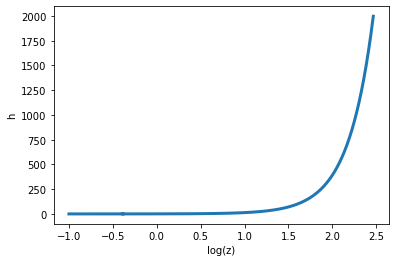

In [26]:
# Se excluyen los valores que no son de interes en la gráfica
bla = 4159
ble = 80000
S1 = bla + ble
x1 = np.zeros(PL+Pm+Pr-S1, dtype=float)
y1 = np.zeros(PL+Pm+Pr-S1, dtype=float)

for i in range(PL+Pm+Pr-S1):
    x1[i] = np.log10(z_ap[i+S1-ble])
    y1[i] = (H_ap[i+S1-ble]* 3.1 * np.power(10., 16.) * np.power(10., 6.))/100000

plt.plot(x1, y1, linewidth=3)
plt.xlabel('log(z)')
plt.ylabel('h')
plt.show()

C:\Users\yo_fu\AppData\Local\Temp/ipykernel_17276/740867874.py:9: RuntimeWarning: divide by zero encountered in log10
  x2[i] = np.log10(z_ap[i+S1-ble])


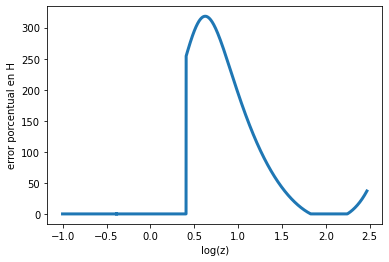

In [27]:
# Se excluyen los valores que no son de interes en la gráfica
bla = 4159
ble = 80000
S1 = bla + ble
x2 = np.zeros(PL+Pm+Pr-S1, dtype=float)
y2 = np.zeros(PL+Pm+Pr-S1, dtype=float)

for i in range(PL+Pm+Pr-S1):
    x2[i] = np.log10(z_ap[i+S1-ble])
    y2[i] = dif_H[i+S1-ble]

plt.plot(x2, y2, linewidth=3)
plt.xlabel('log(z)')
plt.ylabel('error porcentual en H')
plt.show()

                                              ## Resetear en este punto ##

                                              ## Cosmología LCDM, H0 lejos ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print(np.__version__)

1.20.3


In [2]:
# Constantes medidas
G0 = 6.67430 * np.power(10., -11.)
h_lejos = 0.669 # valor de h hoy determinado a partir del CMB y de LCDM
H0_lejos = (h_lejos * 100 * np.power(10., 3.)) / (3.09 * np.power(10., 16.) * np.power(10., 6.)) # Constante de Hubble medido en universo temprano
c = 2.99792458 * np.power(10., 5.) * np.power(10., 3.)

In [3]:
# Parámetros iniciales (parámetros de densidad asumiendo H0 medido en el universo temprano)
Omega_r0 = (4.152 * np.power(10., -5.)) / np.power(h_lejos, 2.)
Omega_m0 = 0.143 / np.power(h_lejos, 2.)
Omega_L0 = 1 - Omega_m0 - Omega_r0
L_clas = (3 * Omega_L0 * np.power(H0_lejos, 2.))/np.power(c, 2.)

P = 1000000 # Número de pasos
tHi = 0. # tiempo inicial multiplicado por H0
tHf = 1. # tiempo final multiplicado por H0
Delta_tH_ini = (tHf - tHi) / P # Largo del paso inicial

a1 = np.zeros(P, dtype=np.float64)
Delta_a = np.zeros(P, dtype=np.float64)
tH = np.zeros(P, dtype=np.float64)
Delta_tH = np.zeros(P, dtype=np.float64)

# Condiciones iniciales
a1[0] = 1.
tH[0] = 1.
Delta_tH[0] = Delta_tH_ini

In [4]:
# Resolver la evolución del factor de escala en cosmología clásica
for i in range(P-1):
    Delta_a[i] = np.sqrt((Omega_r0/np.power(a1[i], 2.)) + (Omega_m0/a1[i]) + (Omega_L0*np.power(a1[i], 2.))) * Delta_tH[i]
    tH[i+1] = tH[i] - Delta_tH[i]
    a1[i+1] = a1[i] - Delta_a[i]
    Delta_tH[i+1] = (Delta_a[0]/Delta_tH[0]) * (Delta_tH[i]/Delta_a[i]) * Delta_tH[0]

P_ini = P - 9
t = np.zeros(P_ini, dtype=np.float64)
a = np.zeros(P_ini, dtype=np.float64)
z = np.zeros(P_ini, dtype=np.float64)
Delta_t = np.zeros(P, dtype=np.float64)

# Orden del factor de escala y del tiempo. Se excluyen los factores de escala negativos
for i in range(P_ini):
    t[i] = (tH[P_ini-i]/H0_lejos) - (tH[P_ini]/H0_lejos)
    a[i] = a1[P_ini-i]
    z[i] = (1./a[i]) - 1.

for i in range(P):
    Delta_t[i] = Delta_tH[P-1-i]/H0_lejos #se transforman los Delta_tH a Delta_t y se ordenan

t0 = t[P_ini-1] # Edad del universo cosmología LCDM

In [5]:
Pm = P_ini - 1
Da = np.zeros(Pm, dtype=np.float64)
H = np.zeros(Pm, dtype=np.float64)

# Cálculo de la derivada del factor de escala y del parámetro de Hubble
for i in range(Pm):
    Da[i] = (a[i+1]-a[i])/(t[i+1]-t[i])
    H[i] = Da[i]/a[i]

In [6]:
print("a_B:", a[0])
print("Da_B", Da[0])
print("t_B en años:", t[0]/(60.*60.*24.*365.))
print("z_B:", z[0])
print("h_B:", (H[0] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print(" ")
print("a_r-m:", a[285])
print("Da_r-m", Da[285])
print("t_r-m en años:", t[285]/(60.*60.*24.*365.))
print("z_r-m:", z[285])
print("h_r-m:", (H[285] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print("Ome_r-Ome_m:", (Omega_r0/np.power(a[285], 2.)) - (Omega_m0/a[285]))
print(" ")
print("a_CMB:", a[902])
print("Da_CMB", Da[902])
print("t_CMB en años:", t[902]/(60.*60.*24.*365.))
print("z_CMB:", z[902])
print("h_CMB:", (H[902] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print(" ")
print("a_m-L:", a[777264])
print("Da_m-L", Da[777264])
print("t_m-L en millones de años:", t[777264]/(60.*60.*24.*365.*np.power(10., 6.)))
print("z_m-L:", z[777264])
print("h_m-L:", (H[777264] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print("Ome_m-Ome_L:", (Omega_m0/a[777264]) - (Omega_L0*np.power(a[777264], 2.)))
print(" ")
print("a_0:", a[P_ini-1])
print("Da_0", Da[P_ini-2])
print("L_0", L_clas)
print("t_0 en millones de años:", t[P_ini-1]/(60.*60.*24.*365.*np.power(10., 6.)))
print("z_0:", z[P_ini-1])
print("h_0:", (H[P_ini-2] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)))
print("Omega_rad:", Omega_r0)
print("Omega_mat:", Omega_m0)
print("Omega_Lam:", Omega_L0)

a_B: 2.5941567934856022e-08
Da_B 1.1637961778724567e-14
t_B en años: 0.0
z_B: 38548170.12485958
h_B: 138624241936.97256
 
a_r-m: 0.00029015303474794175
Da_r-m 1.0135873830262233e-16
t_r-m en años: 50161.45509601725
z_r-m: 3445.45714585997
h_r-m: 107942.52130679283
Ome_r-Ome_m: 0.7461867690285544
 
a_CMB: 0.0009079300825899778
Da_CMB 4.6627175314517976e-17
t_CMB en años: 366939.48510616436
z_CMB: 1100.4063959059292
h_CMB: 15868.83995636108
 
a_m-L: 0.7772730978350654
Da_m-L 1.9632626305877053e-18
t_m-L en millones de años: 10427.51728256271
z_m-L: 0.28654909424408825
h_m-L: 0.7804826315760763
Ome_m-Ome_L: 4.5520317015768086e-08
 
a_0: 0.999999
Da_0 2.165047416399191e-18
L_0 1.0645791827423848e-52
t_0 en millones de años: 13867.070315271378
z_0: 1.000001000006634e-06
h_0: 0.669000989668981
Omega_rad: 9.276947723327099e-05
Omega_mat: 0.31950951937277816
Omega_Lam: 0.6803977111499886


In [7]:
h_CMB_LCDM_lejos = (H[902] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)) # valor de h en la época del CMB para LCDM considerando H0 lejos
print("h_CMB_LCDM_lejos:", h_CMB_LCDM_lejos)

h_CMB_LCDM_lejos: 15868.83995636108


In [8]:
h_CMB_LCDM_cerca = 15866.058491985557

In [11]:
P_error_mediciones = 100*abs((h_CMB_LCDM_cerca-h_CMB_LCDM_lejos)/h_CMB_LCDM_cerca)
print("Error de h en la época del CMB considerando H0 lejos y H0 cerca:", P_error_mediciones, "%")

Error de h en la época del CMB considerando H0 lejos y H0 cerca: 0.0175309096265325 %


                                       ## Cosmología LCDM aproximada, H0 lejos ##
                                       
                                       
                                       Esto hay que actualizarlo

In [ ]:
# Dominio de Lambda

# Parámetros iniciales
c = 2.99792458 * np.power(10., 5.) * np.power(10., 3.)
G0 = 6.67430 * np.power(10., -11.)
DG0 = 0 * np.power(10., -14.) * G0 # Derivada de G hoy
PtiL = 1. # porcentaje del tiempo de transición materia-Lambda SD respecto a la cosmología clásica (1=100%, no hay cambio)

Delta_tL = Delta_t[777264]
tiL = (t0-t[777264]) * PtiL # tiempo de transición materia-Lambda SD (duración de Lambda)
PL = 228479 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_lejos
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    if i == 0:
        L[PL-1-i] = L_clas
    if i != 0:
        L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if zL[PL-1-i-1] >= z[777264]:
        print(i)
        break

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

# Dominio de materia

# Parámetros iniciales
Ptim = 1. # porcentaje del tiempo de transición radiacion-materia SD respecto a la cosmología clásica (1=100%, no hay cambio)

Delta_tm = Delta_t[10000]
tim = (t[777264]-t[285]) * Ptim # tiempo de transición radiacion-materia SD (duración de materia)
Pm = 3822588 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c,2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i],2.))/(np.power(am[Pm-1-i],2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)))
    #if i%80000 == 0:
    #    print(tm[Pm-1-i])
    #    print(am[Pm-1-i])
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if zm[Pm-1-i-1] >= z[285]:
        print(i)
        break

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)))
zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

In [ ]:
h_CMB_aprox_lejos = (Hm[124] * 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.)) # valor de h en la época del CMB para LCDM considerando H0 lejos
print("h_CMB_aprox_lejos", h_CMB_aprox_lejos)

In [ ]:
P_error_metodo_k = 100*abs(h_CMB_LCDM_lejos-h_CMB_aprox_lejos)/h_CMB_LCDM_lejos
print("Error de h en la época del CMB introducido por el método aproximado:", P_error_metodo_k, "%")